In [1]:
#all installs and/or imports here
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder


In [2]:
#create the dataframes from CSV files
Xtrain = pd.read_csv("Data/house-train.csv", ",")
Xtest = pd.read_csv("Data/house-test.csv", ",")
#set y value
y = Xtrain['SalePrice']
#drop unnecessary columns
Xtrain = Xtrain.drop(['Id','SalePrice'], 1)
Xtest = Xtest.drop(['Id'], 1)


In [3]:
Xtrain.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
Xtest.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


C:\Users\shama\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


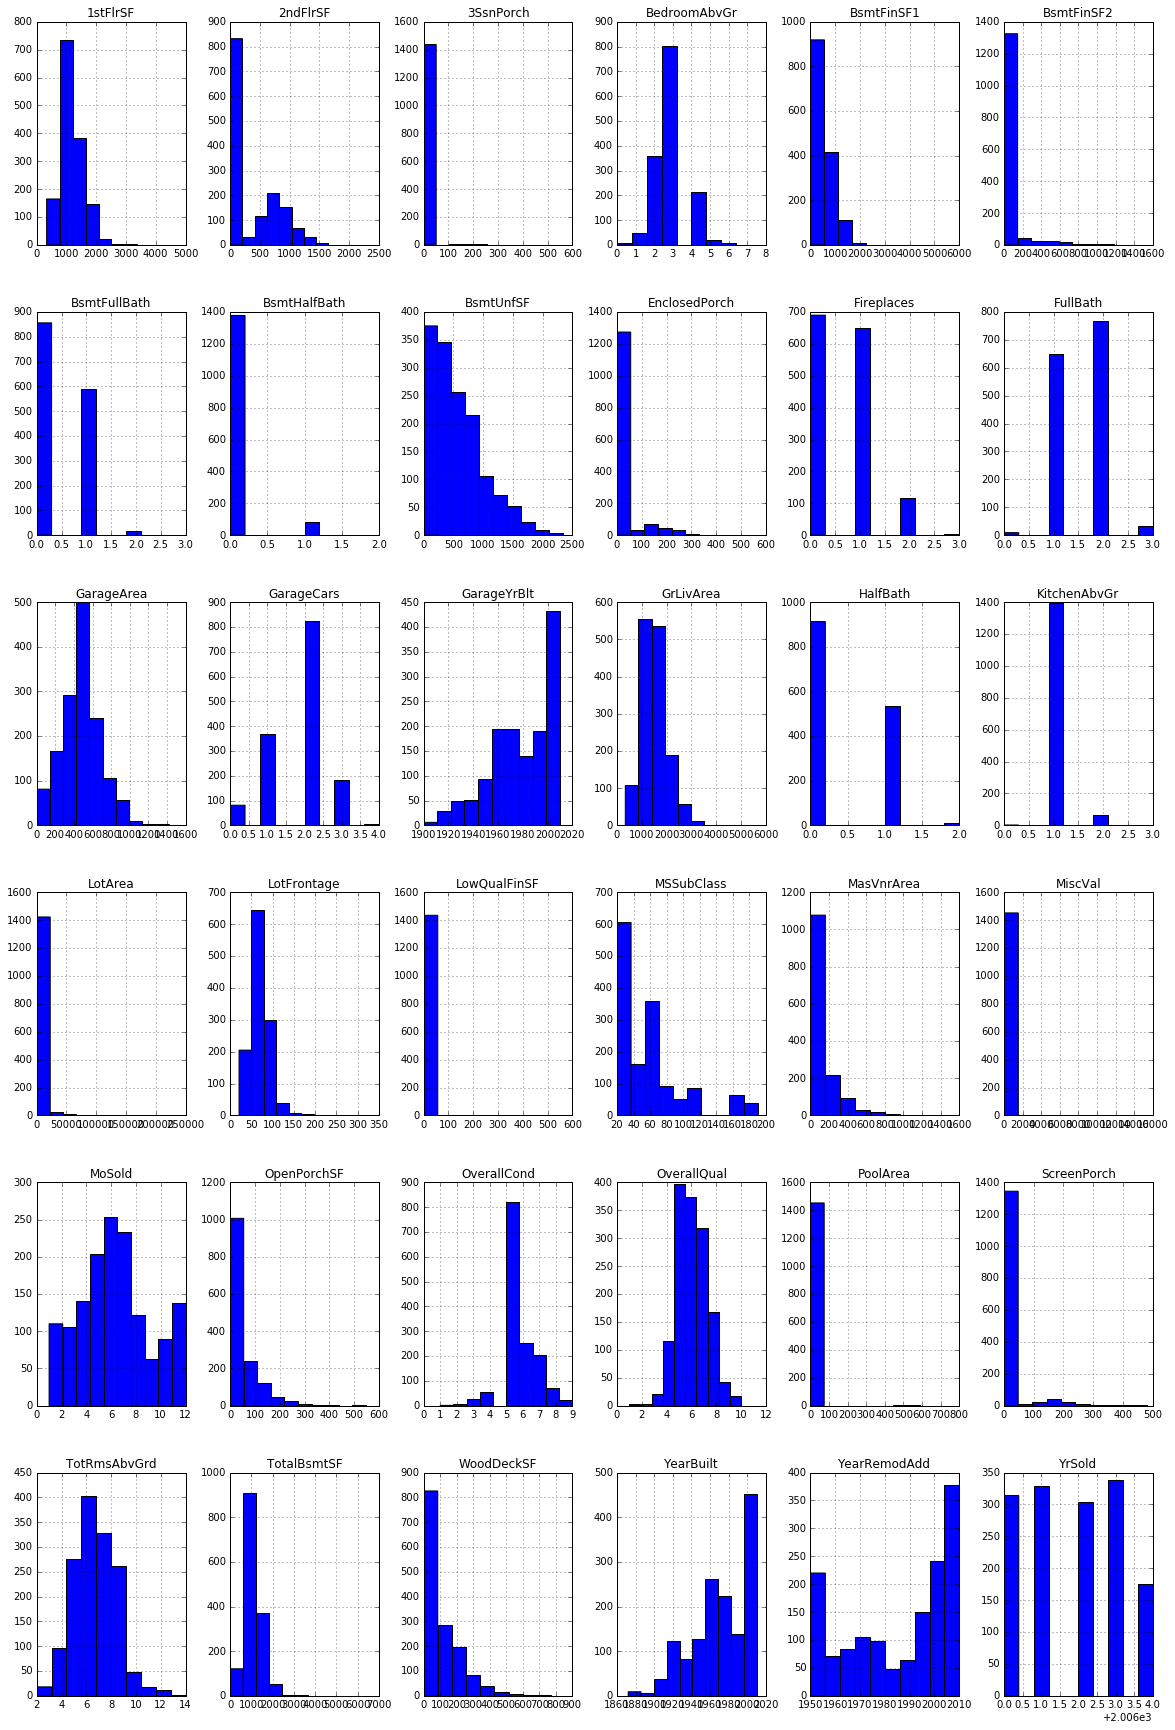

In [5]:
#basic stats for train data - 'mean', 'std', 'min', 'max', 'Q25', 'Q50', 'Q75'
pd.DataFrame(Xtrain.mean(), columns=['mean']).to_csv("Data/mean.csv")
pd.DataFrame(Xtrain.std(), columns=['std']).to_csv("Data/std.csv")
pd.DataFrame(Xtrain.min(), columns=['min']).to_csv("Data/min.csv")
pd.DataFrame(Xtrain.max(), columns=['max']).to_csv("Data/max.csv")
pd.DataFrame(Xtrain.quantile(q=0.25), columns=['Q25']).to_csv("Data/Q25.csv")
pd.DataFrame(Xtrain.quantile(q=0.5), columns=['Q50']).to_csv("Data/Q50.csv")
pd.DataFrame(Xtrain.quantile(q=0.75), columns=['Q75']).to_csv("Data/Q75.csv")
#histograms
Xtrain.hist(figsize=(20,30))
plt.savefig("Data/hist.png")


In [6]:
#check if missing values exist - Xtrain - YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, and YrSold
Xtrain.loc[:,['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']].isnull().any()        
#missing values in GarageYrBlt


YearBuilt       False
YearRemodAdd    False
GarageYrBlt      True
MoSold          False
YrSold          False
dtype: bool

In [7]:
#check if missing values exist - Xtest - YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, and YrSold
Xtest.loc[:,['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']].isnull().any()        
#missing values in GarageYrBlt


YearBuilt       False
YearRemodAdd    False
GarageYrBlt      True
MoSold          False
YrSold          False
dtype: bool

In [8]:
#missing values in GarageYrBlt - Xtrain
Xtrain['GarageYrBlt'].fillna(Xtrain['YearBuilt'], inplace=True)


In [9]:
#missing values in GarageYrBlt - Xtest
Xtest['GarageYrBlt'].fillna(Xtest['YearBuilt'], inplace=True)


In [10]:
#for YrSold, MoSold, YearRemodAdd, and GarageYrBlt which should not be treated like usual numbers - Xtrain
Xtrain['MoSold']=Xtrain['MoSold'].astype(str)
Xtrain['YrSold']=Xtrain['YrSold'].astype(str)
Xtrain['GarageYrBlt']=Xtrain['GarageYrBlt'].astype(int)
#create new column
Xtrain['YrMoSold']=Xtrain['YrSold']+Xtrain['MoSold']
#convert to datetype
Xtrain['YrMoSold']=pd.to_datetime(Xtrain['YrMoSold'], format='%Y%m', errors='ignore')
Xtrain['YearRemodAdd']=pd.to_datetime(Xtrain['YearRemodAdd'], format='%Y', errors='ignore')
Xtrain['GarageYrBlt']=pd.to_datetime(Xtrain['GarageYrBlt'], format='%Y', errors='ignore')
#drop the old columns for YrSold and MoSold
Xtrain=Xtrain.drop(['MoSold','YrSold'],1)
#check how data looks like now
Xtrain.loc[:,['YearRemodAdd','GarageYrBlt','YrMoSold']].head()


,YearRemodAdd,GarageYrBlt,YrMoSold
0,2003-01-01,2003-01-01,2008-02-01
1,1976-01-01,1976-01-01,2007-05-01
2,2002-01-01,2001-01-01,2008-09-01
3,1970-01-01,1998-01-01,2006-02-01
4,2000-01-01,2000-01-01,2008-12-01


In [11]:
#for YrSold, MoSold, YearRemodAdd, and GarageYrBlt which should not be treated like usual numbers - Xtest
Xtest['MoSold']=Xtest['MoSold'].astype(str)
Xtest['YrSold']=Xtest['YrSold'].astype(str)
Xtest['GarageYrBlt']=Xtest['GarageYrBlt'].astype(int)
#create new column
Xtest['YrMoSold']=Xtest['YrSold']+Xtest['MoSold']
#convert to datetype
Xtest['YrMoSold']=pd.to_datetime(Xtest['YrMoSold'], format='%Y%m', errors='ignore')
Xtest['YearRemodAdd']=pd.to_datetime(Xtest['YearRemodAdd'], format='%Y', errors='ignore')
Xtest['GarageYrBlt']=pd.to_datetime(Xtest['GarageYrBlt'], format='%Y', errors='ignore')
#drop the old columns for YrSold and MoSold
Xtest=Xtest.drop(['MoSold','YrSold'],1)
#check how data looks like now
Xtest.loc[:,['YearRemodAdd','GarageYrBlt','YrMoSold']].head()


,YearRemodAdd,GarageYrBlt,YrMoSold
0,1961-01-01,1961-01-01,2010-06-01
1,1958-01-01,1958-01-01,2010-06-01
2,1998-01-01,1997-01-01,2010-03-01
3,1998-01-01,1998-01-01,2010-06-01
4,1992-01-01,1992-01-01,2010-01-01


In [12]:
#check if missing values exist - Xtrain
#the column names printed afterwards have missing values
df = pd.DataFrame({'colname':Xtrain.isnull().any().index, 'isnull':Xtrain.isnull().any().values})
missing = []
for r, row in df.iterrows():
    if row['isnull'] == True:
        missing = missing + [row['colname']]
print(missing)


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
#missing values in rest of the columns - Xtrain
for m in missing:
    if m in list(Xtrain.select_dtypes(include=['object'])):
        Xtrain[m].fillna('NA', inplace=True)
    if m in list(Xtrain.select_dtypes(exclude=['object','datetime'])):
        Xtrain[m].fillna(Xtrain[m].mean(), inplace=True)

Xtrain.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,YrMoSold
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,NA,NA,NA,0,WD,Normal,2008-02-01
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,0,NA,NA,NA,0,WD,Normal,2007-05-01
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,0,NA,NA,NA,0,WD,Normal,2008-09-01
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,0,NA,NA,NA,0,WD,Abnorml,2006-02-01
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,0,NA,NA,NA,0,WD,Normal,2008-12-01


In [14]:
#check if missing values exist - Xtest
#the column names printed afterwards have missing values
df = pd.DataFrame({'colname':Xtest.isnull().any().index, 'isnull':Xtest.isnull().any().values})
missing = []
for r, row in df.iterrows():
    if row['isnull'] == True:
        missing = missing + [row['colname']]
print(missing)


['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [15]:
#missing values in rest of the columns - Xtest
for m in missing:
    if m in list(Xtest.select_dtypes(include=['object'])):
        Xtest[m].fillna('NA', inplace=True)
    if m in list(Xtest.select_dtypes(exclude=['object','datetime'])):
        Xtest[m].fillna(Xtest[m].mean(), inplace=True)

Xtest.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,YrMoSold
0,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,120,0,NA,MnPrv,NA,0,WD,Normal,2010-06-01
1,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,0,NA,NA,Gar2,12500,WD,Normal,2010-06-01
2,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,0,NA,MnPrv,NA,0,WD,Normal,2010-03-01
3,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,0,NA,NA,NA,0,WD,Normal,2010-06-01
4,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,Inside,...,0,144,0,NA,NA,NA,0,WD,Normal,2010-01-01


In [16]:
#change values in non-numeric columns to numbers - train and test
for c in list(Xtrain.select_dtypes(include=['object'])):
    all_vals = pd.unique(pd.concat([Xtrain[c], Xtest[c]]))
    #print(c, ":", all_vals)
    for index, item in enumerate(all_vals):
        #replace values in train
        Xtrain.loc[(Xtrain[c] == item) , c] = index
        #replace values in test
        Xtest.loc[(Xtest[c] == item) , c] = index
    #changing datatype
    Xtrain[c] = Xtrain[c].astype(int)
    Xtest[c] = Xtest[c].astype(int)


In [17]:
#normalize datetime columns - YrMoSold
le = LabelEncoder()
all_vals = pd.unique(pd.concat([Xtrain['YrMoSold'], Xtest['YrMoSold']]))
le.fit(all_vals)
le.classes_

#appending new column - train
Xtrain['YrMoSold_enc'] = le.transform(Xtrain['YrMoSold'])
Xtrain = Xtrain.drop(['YrMoSold'],1)

#appending new column - test
Xtest['YrMoSold_enc'] = le.transform(Xtest['YrMoSold'])
Xtest = Xtest.drop(['YrMoSold'],1)


In [18]:
#normalize datetime columns - GarageYrBlt
le = LabelEncoder()
all_vals = pd.unique(pd.concat([Xtrain['GarageYrBlt'], Xtest['GarageYrBlt']]))
le.fit(all_vals)
le.classes_

#appending new column - train
Xtrain['GarageYrBlt_enc'] = le.transform(Xtrain['GarageYrBlt'])
Xtrain = Xtrain.drop(['GarageYrBlt'],1)

#appending new column - test
Xtest['GarageYrBlt_enc'] = le.transform(Xtest['GarageYrBlt'])
Xtest = Xtest.drop(['GarageYrBlt'],1)


In [19]:
#normalize datetime columns - YearRemodAdd
le = LabelEncoder()
all_vals = pd.unique(pd.concat([Xtrain['YearRemodAdd'], Xtest['YearRemodAdd']]))
le.fit(all_vals)
le.classes_

#appending new column - train
Xtrain['YearRemodAdd_enc'] = le.transform(Xtrain['YearRemodAdd'])
Xtrain = Xtrain.drop(['YearRemodAdd'],1)

#appending new column - test
Xtest['YearRemodAdd_enc'] = le.transform(Xtest['YearRemodAdd'])
Xtest = Xtest.drop(['YearRemodAdd'],1)


In [20]:
#normalize numeric columns which are actually categories - MSSubClass
le = LabelEncoder()
all_vals = pd.unique(pd.concat([Xtrain['MSSubClass'], Xtest['MSSubClass']]))
le.fit(all_vals)
le.classes_

#appending new column - train
Xtrain['MSSubClass_enc'] = le.transform(Xtrain['MSSubClass'])
Xtrain = Xtrain.drop(['MSSubClass'],1)

#appending new column - test
Xtest['MSSubClass_enc'] = le.transform(Xtest['MSSubClass'])
Xtest = Xtest.drop(['MSSubClass'],1)


In [21]:
#normalize numeric columns which are actually categories - OverallQual
le = LabelEncoder()
all_vals = pd.unique(pd.concat([Xtrain['OverallQual'], Xtest['OverallQual']]))
le.fit(all_vals)
le.classes_

#appending new column - train
Xtrain['OverallQual_enc'] = le.transform(Xtrain['OverallQual'])
Xtrain = Xtrain.drop(['OverallQual'],1)

#appending new column - test
Xtest['OverallQual_enc'] = le.transform(Xtest['OverallQual'])
Xtest = Xtest.drop(['OverallQual'],1)


In [22]:
#normalize numeric columns which are actually categories - OverallCond
le = LabelEncoder()
all_vals = pd.unique(pd.concat([Xtrain['OverallCond'], Xtest['OverallCond']]))
le.fit(all_vals)
le.classes_

#appending new column - train
Xtrain['OverallCond_enc'] = le.transform(Xtrain['OverallCond'])
Xtrain = Xtrain.drop(['OverallCond'],1)

#appending new column - test
Xtest['OverallCond_enc'] = le.transform(Xtest['OverallCond'])
Xtest = Xtest.drop(['OverallCond'],1)


In [23]:
#Also change MiscFeature column to reflect MiscVal
le = LabelEncoder()
all_vals = pd.unique(pd.concat([Xtrain['MiscVal'], Xtest['MiscVal']]))
le.fit(all_vals)
le.classes_

for index, item in enumerate(le.classes_):
    #replace values in train
    Xtrain.loc[(Xtrain['MiscVal'] == item) , 'MiscFeature'] = index
    #replace values in test
    Xtest.loc[(Xtest['MiscVal'] == item) , 'MiscFeature'] = index


In [24]:
#check if missing values exist - y (none)
y.isnull().any()


False

In [25]:
#create TotalBaths column with existing columns
#derive single column for baths
Xtrain['TotalBaths'] = Xtrain['FullBath'] + Xtrain['HalfBath'] + Xtrain['BsmtFullBath'] + Xtrain['BsmtHalfBath']
Xtrain = Xtrain.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'],1)
Xtest['TotalBaths'] = Xtest['FullBath'] + Xtest['HalfBath'] + Xtest['BsmtFullBath'] + Xtest['BsmtHalfBath']
Xtest = Xtest.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'],1)


In [26]:
Xtrain.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,SaleType,SaleCondition,YrMoSold_enc,GarageYrBlt_enc,YearRemodAdd_enc,MSSubClass_enc,OverallQual_enc,OverallCond_enc,TotalBaths
0,0,65.0,8450,0,0,0,0,0,0,0,...,0,0,0,25,102,53,5,6,4,4
1,0,80.0,9600,0,0,0,0,0,1,0,...,0,0,0,16,75,26,0,5,7,3
2,0,68.0,11250,0,0,1,0,0,0,0,...,0,0,0,32,100,52,5,6,4,4
3,0,60.0,9550,0,0,1,0,0,2,0,...,0,0,1,1,97,20,6,6,4,2
4,0,84.0,14260,0,0,1,0,0,1,0,...,0,0,0,35,99,50,5,7,4,4


In [27]:
Xtest.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,SaleType,SaleCondition,YrMoSold_enc,GarageYrBlt_enc,YearRemodAdd_enc,MSSubClass_enc,OverallQual_enc,OverallCond_enc,TotalBaths
0,4,80.0,11622,0,0,0,0,0,0,0,...,0,0,0,53,60,11,0,4,5,1.0
1,0,81.0,14267,0,0,1,0,0,2,0,...,12500,0,0,53,57,8,0,5,5,2.0
2,0,74.0,13830,0,0,1,0,0,0,0,...,0,0,0,50,96,48,5,4,4,3.0
3,0,78.0,9978,0,0,1,0,0,0,0,...,0,0,0,53,97,48,5,5,5,3.0
4,0,43.0,5005,0,0,1,3,0,0,0,...,0,0,0,48,91,42,11,7,4,2.0


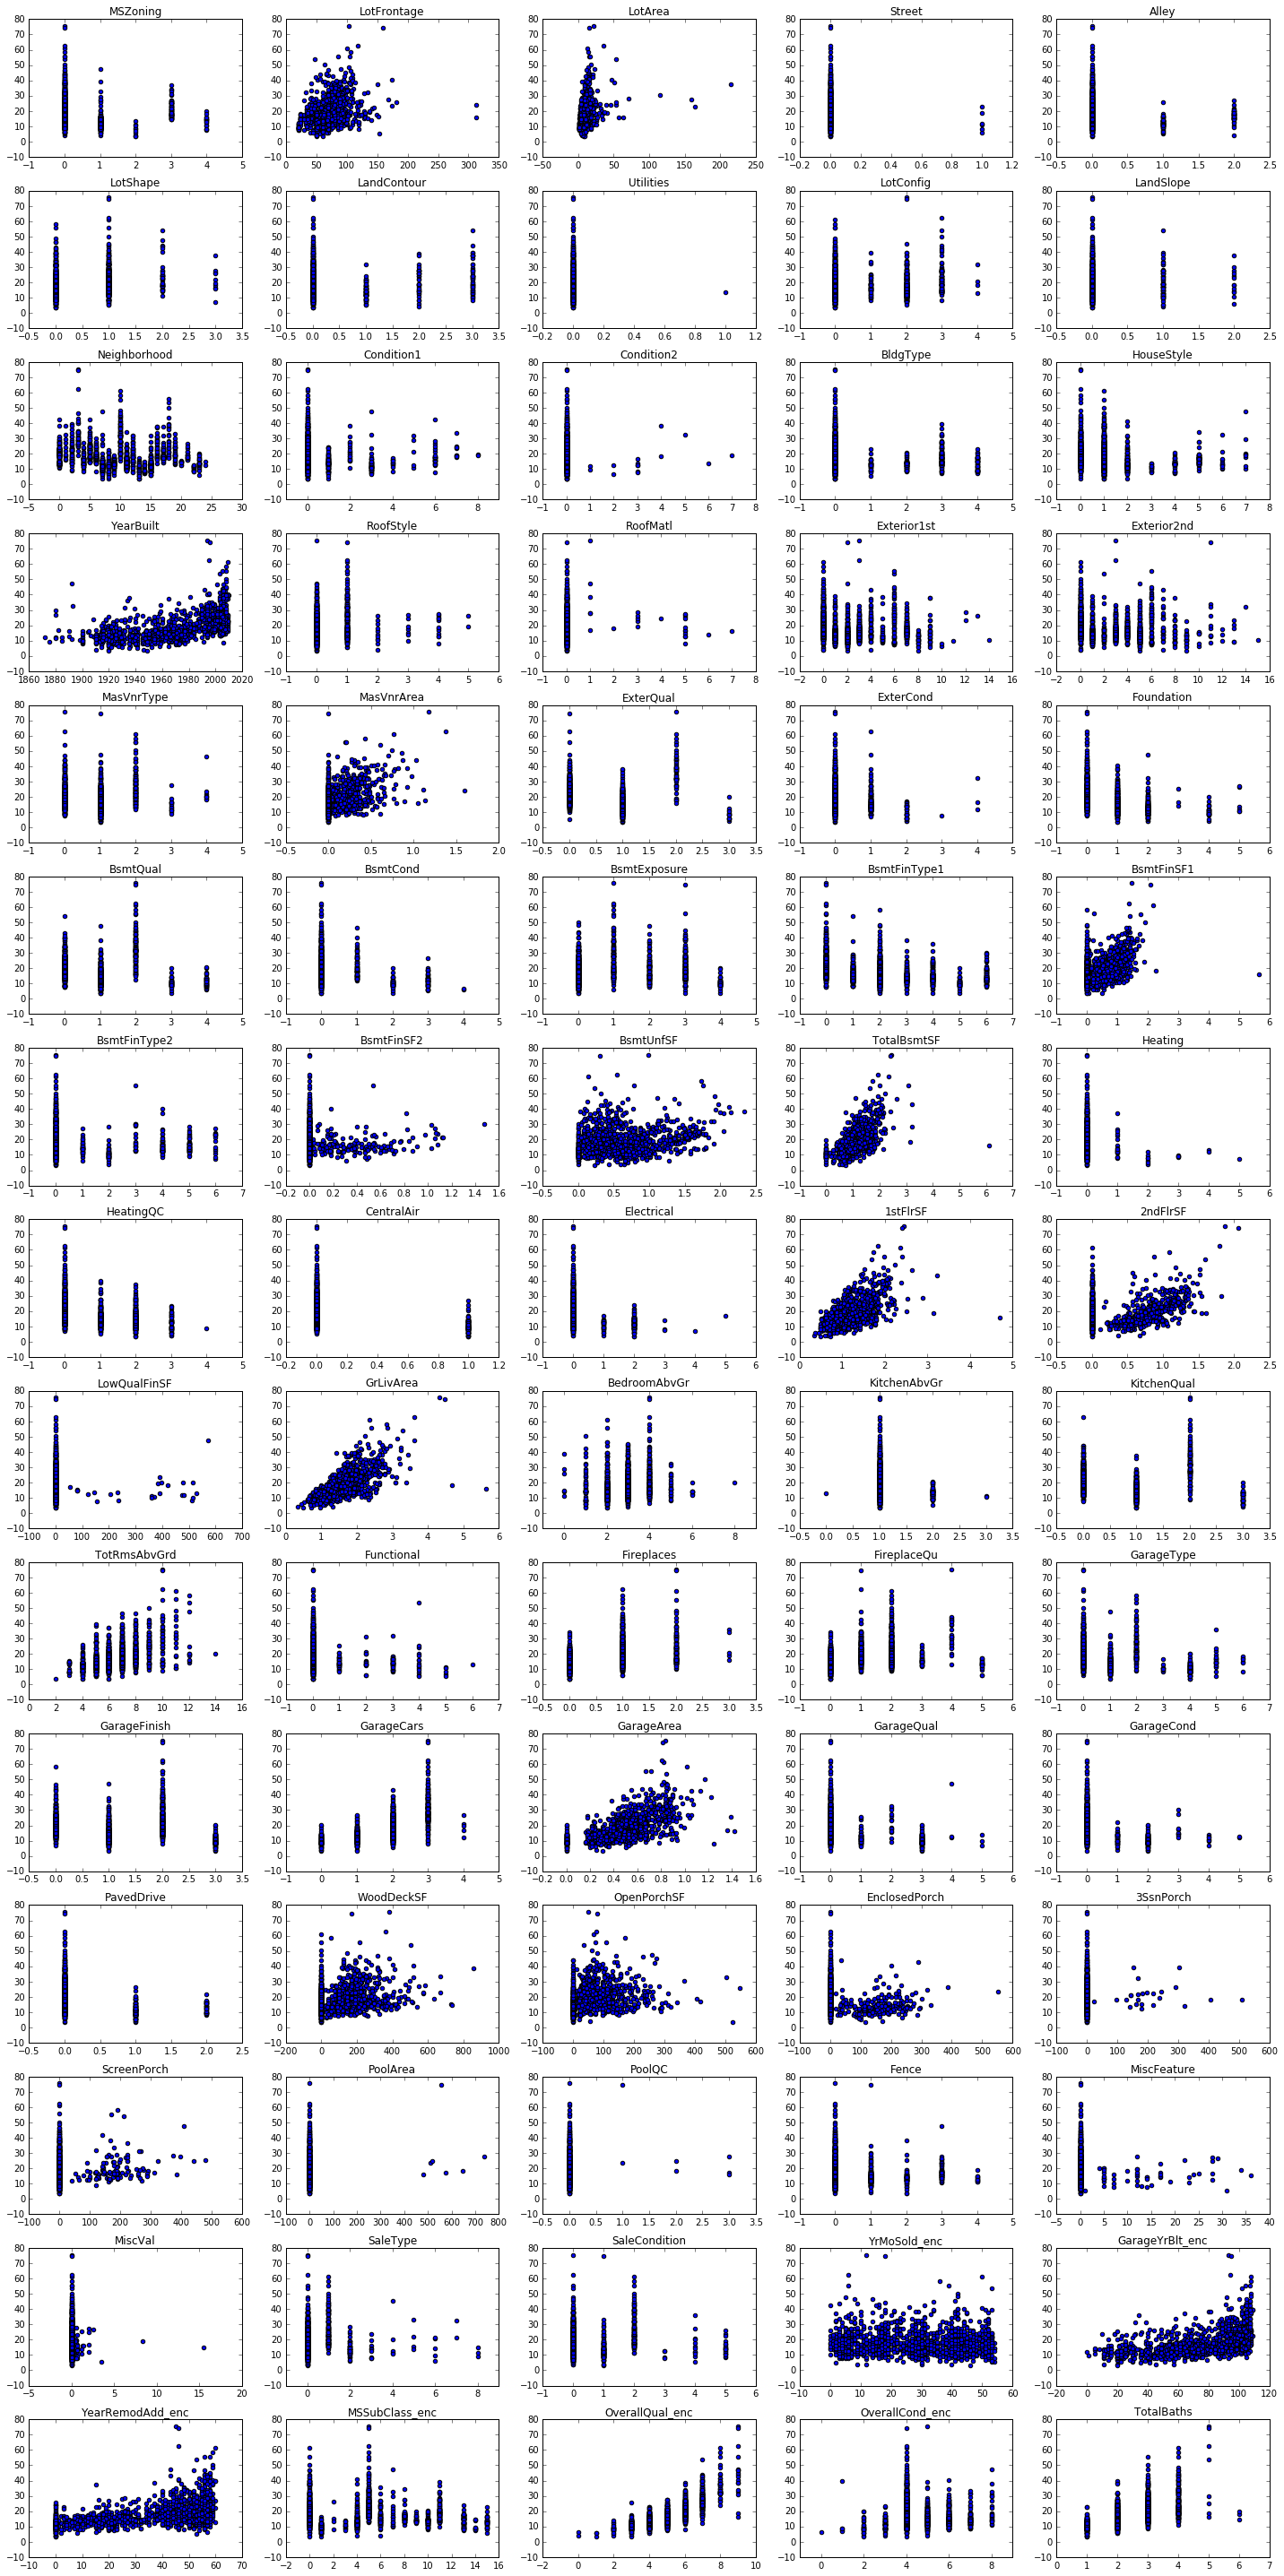

In [28]:
#create plots
fig = plt.figure(figsize=(20,40))
num = 0

for c in list(Xtrain):
    num = num + 1
    ax = fig.add_subplot(15, 5, num)
    X = Xtrain[c]
    if X.max()-X.min() >= 1000:
        X = X/1000
    ax.scatter(X, y/10000)
    ax.set_title(c)

fig.tight_layout()
plt.savefig("Data/plots.png")


In [29]:
#optional code to drop precreated columns
#Xtrain2 = Xtrain2.drop(['SalePrice_LR', 'SalePrice_RR', 'SalePrice_LO', 'SalePrice_BR', 'SalePrice_RF', 'SalePrice_ET', 'SalePrice_BA', 'SalePrice_GB'], 1)
#Xtest2 = Xtest2.drop(['SalePrice_LR', 'SalePrice_RR', 'SalePrice_LO', 'SalePrice_BR', 'SalePrice_RF', 'SalePrice_ET', 'SalePrice_BA', 'SalePrice_GB'], 1)


In [30]:
#only relevant columns
X1 = Xtrain.iloc[:,:75]
X2 = Xtest.iloc[:,:75]


In [31]:
#function for evaluation
#taken from https://www.kaggle.com/marknagelberg/caterpillar-tube-pricing/rmsle-function
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5


In [32]:
#extra trees - Xtrain
et = ExtraTreesRegressor()
et.fit(X1, y)
Xtrain['SalePrice_ET'] = et.predict(X1)
print("RMSLE value for extra trees using train data:", rmsle(y, Xtrain['SalePrice_ET']))


RMSLE value for extra trees using train data: 0.0


In [33]:
#extra trees - Xtest
Xtest['SalePrice_ET'] = et.predict(X2)
Xtest['SalePrice_ET'].head()


0    131280.0
1    146290.0
2    176214.0
3    195963.2
4    205800.0
Name: SalePrice_ET, dtype: float64

In [34]:
#bagging regressor - Xtrain
ba = BaggingRegressor()
ba.fit(X1, y)
Xtrain['SalePrice_BA'] = ba.predict(X1)
print("RMSLE value for extra trees using train data:", rmsle(y, Xtrain['SalePrice_BA']))


RMSLE value for extra trees using train data: 0.06726610934074206


In [35]:
#bagging regressor - Xtest
Xtest['SalePrice_BA'] = ba.predict(X2)
Xtest['SalePrice_BA'].head()


0    110160.0
1    163345.0
2    172050.0
3    189250.0
4    191850.0
Name: SalePrice_BA, dtype: float64

In [36]:
#gradient boosting - Xtrain
gb = GradientBoostingRegressor()
gb.fit(X1, y)
Xtrain['SalePrice_GB'] = gb.predict(X1)
print("RMSLE value for extra trees using train data:", rmsle(y, Xtrain['SalePrice_GB']))


RMSLE value for extra trees using train data: 0.09380897114010105


In [37]:
#gradient boosting - Xtest
Xtest['SalePrice_GB'] =gb.predict(X2)
Xtest['SalePrice_GB'].head()


0    122766.540505
1    156047.391715
2    177461.424657
3    179996.254288
4    188698.548517
Name: SalePrice_GB, dtype: float64

In [38]:
#load sample submission file provided
submission = pd.read_csv("Data/sample-submission.csv", ",")
submission.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [39]:
#create submission files
for c in list(Xtest.iloc[:,75:]):
    submission['SalePrice'] = Xtest[c]
    fname = 'Data/submission_' + c + ".csv"
    submission.to_csv(fname, index=False)
    print("Created ", fname)


Created  Data/submission_SalePrice_ET.csv
Created  Data/submission_SalePrice_BA.csv
Created  Data/submission_SalePrice_GB.csv
